In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files
uploaded=files.upload()


Saving electricity demand.csv to electricity demand.csv


In [ ]:
df1=pd.read_csv('electricity demand.csv')

df1.tail(10)

,Date,Demand (MW),Temp_max,Temp_min,Humidity,Pressure,Wind_speed,Population Density
3790,22/05/2022,1412.0,34,24,84,1003,2.0,5252842
3791,23/05/2022,1286.0,34,23,82,1002,2.0,5252842
3792,24/05/2022,1400.0,35,27,81,1001,4.0,5252842
3793,25/05/2022,1445.0,30,26,83,1000,4.0,5252842
3794,26/05/2022,1452.0,30,24,84,1003,4.0,5252842
3795,27/05/2022,1174.0,30,24,85,1004,4.0,5252842
3796,28/05/2022,1424.0,31,23,80,1002,4.0,5252842
3797,29/05/2022,1221.0,34,25,83,1001,6.0,5252842
3798,30/05/2022,1233.0,32,24,84,1000,6.0,5252842
3799,31/05/2022,1323.0,34,26,82,999,4.0,5252842


In [ ]:
#df['datetime'] = pd.to_datetime(df['Date'])
#df = df.set_index('datetime')
#df.drop(['Date'], axis=1, inplace=True)
#df.info()
df = df1
#df["Year"] = pd.to_datetime(df1["Date"]).dt.year
#df["Month"] = pd.to_datetime(df1["Date"]).dt.month
#df["Day"] = pd.to_datetime(df1["Date"]).dt.day_name()
df = df1.set_index("Date")
df.index = pd.to_datetime(df.index)
df.tail(10)


,Demand (MW),Temp_max,Temp_min,Humidity,Pressure,Wind_speed,Population Density
Date,,,,,,,
2022-05-22,1412.0,34,24,84,1003,2.0,5252842
2022-05-23,1286.0,34,23,82,1002,2.0,5252842
2022-05-24,1400.0,35,27,81,1001,4.0,5252842
2022-05-25,1445.0,30,26,83,1000,4.0,5252842
2022-05-26,1452.0,30,24,84,1003,4.0,5252842
2022-05-27,1174.0,30,24,85,1004,4.0,5252842
2022-05-28,1424.0,31,23,80,1002,4.0,5252842
2022-05-29,1221.0,34,25,83,1001,6.0,5252842
2022-05-30,1233.0,32,24,84,1000,6.0,5252842


In [ ]:
# get data type of each columns
df.dtypes

Demand (MW)           float64
Temp_max               object
Temp_min               object
Humidity                int64
Pressure                int64
Wind_speed            float64
Population Density      int64
dtype: object

In [ ]:
df.isnull().any()

Demand (MW)            True
Temp_max              False
Temp_min              False
Humidity              False
Pressure              False
Wind_speed             True
Population Density    False
dtype: bool

#Label Encoding


In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df

,Temp_max,Temp_min
Date,,
2012-01-01,28,14
2012-02-01,21,16
2012-03-01,23,14
2012-04-01,24,15
2012-05-01,25,13
...,...,...
2022-05-27,30,24
2022-05-28,31,23
2022-05-29,34,25


In [ ]:
obj_df[obj_df.isnull().any(axis=1)]

,Temp_max,Temp_min
Date,,


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lab=LabelEncoder()

In [ ]:
df['Temp_max']=lab.fit_transform(df['Temp_max'])
df['Temp_min']=lab.fit_transform(df['Temp_min'])
#df['Time']=lab.fit_transform(df['Time'])
#df['Day']=lab.fit_transform(df['Day'])

#Handle NaN values

In [ ]:
df.isnull().sum()

Demand (MW)           39
Temp_max               0
Temp_min               0
Humidity               0
Pressure               0
Wind_speed             1
Population Density     0
dtype: int64

In [ ]:

df["Demand (MW)"]=df["Demand (MW)"].replace(np.NaN, df["Demand (MW)"].mean())
df["Wind_speed"]=df["Wind_speed"].replace(np.NaN, df["Wind_speed"].mean())
#df["Time"]=df["Wind_speed"].replace(np.NaN, df["Time"].mean())



In [ ]:
df.describe()

,Demand (MW),Temp_max,Temp_min,Humidity,Pressure,Wind_speed,Population Density
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3.800000e+03
mean,841.904547,18.443421,12.750000,79.547632,1008.579737,4.658331,4.706977e+06
std,224.584980,3.873080,5.673314,6.434504,21.520645,1.664591,2.891909e+05
min,326.000000,0.000000,0.000000,53.000000,106.000000,2.000000,4.272975e+06
25%,636.000000,16.000000,8.000000,76.000000,1004.000000,4.000000,4.446675e+06
50%,833.500000,19.000000,15.000000,81.000000,1009.000000,4.000000,4.720553e+06
75%,1002.000000,21.000000,17.000000,84.000000,1014.000000,6.000000,4.914633e+06
max,1492.000000,28.000000,28.000000,99.000000,1911.000000,15.000000,5.252842e+06


In [ ]:
df.corr()

,Demand (MW),Temp_max,Temp_min,Humidity,Pressure,Wind_speed,Population Density
Demand (MW),1.000000,0.295747,0.191818,0.150072,-0.041015,-0.118694,0.868263
Temp_max,0.295747,1.000000,0.540936,-0.117514,-0.109022,0.044933,0.048447
Temp_min,0.191818,0.540936,1.000000,0.222885,-0.201230,0.050826,-0.043221
Humidity,0.150072,-0.117514,0.222885,1.000000,-0.095027,-0.023343,0.115103
Pressure,-0.041015,-0.109022,-0.201230,-0.095027,1.000000,-0.009107,0.009686
Wind_speed,-0.118694,0.044933,0.050826,-0.023343,-0.009107,1.000000,-0.139105
Population Density,0.868263,0.048447,-0.043221,0.115103,0.009686,-0.139105,1.000000


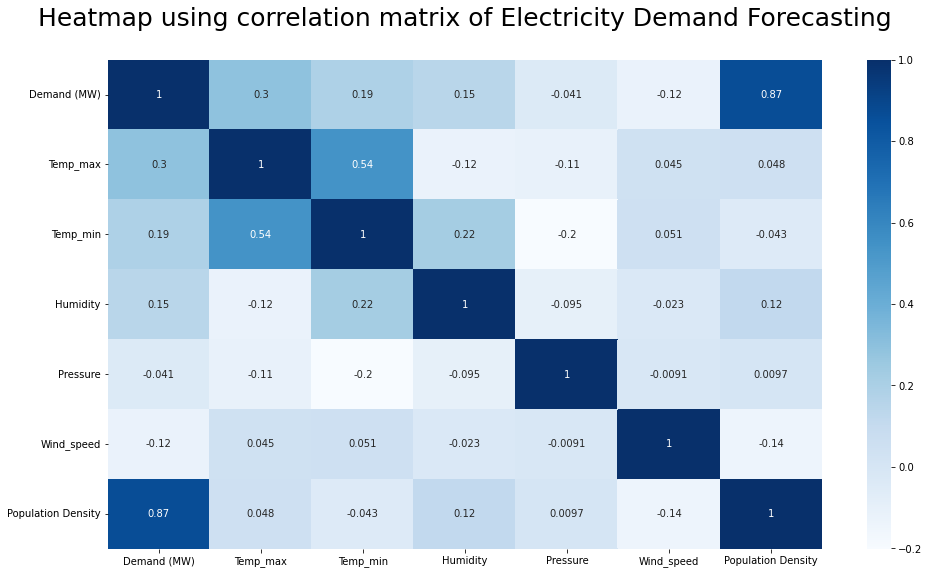

In [ ]:
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9
sns.heatmap(df.corr(),annot=True,cmap='Blues') #show heatmap
plt.title("Heatmap using correlation matrix of Electricity Demand Forecasting\n",fontsize=25)#title of heatmap
plt.style.use('ggplot')

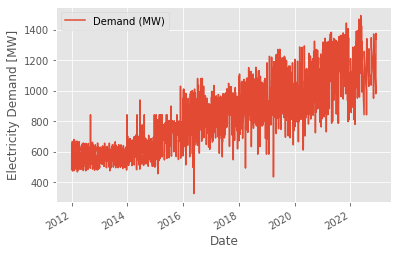

In [ ]:
df['Demand (MW)'].plot()
plt.ylabel('Electricity Demand [MW]')
plt.legend()


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Demand (MW),Temp_max,Temp_min,Humidity,Pressure,Wind_speed,Population Density
0,0.135506,0.571429,0.178571,0.195652,0.503601,0.153846,0.0
1,0.128645,0.321429,0.250000,0.739130,0.503047,0.153846,0.0
2,0.135506,0.392857,0.178571,0.695652,0.503601,0.153846,0.0
3,0.132933,0.428571,0.214286,0.652174,0.503047,0.230769,0.0
4,0.135506,0.464286,0.142857,0.521739,0.503047,0.153846,0.0


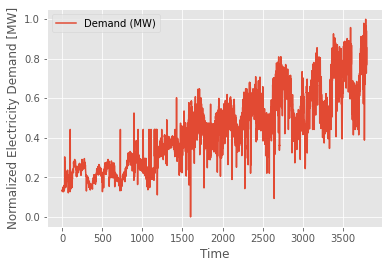

In [ ]:
scaled_df['Demand (MW)'].plot()
plt.ylabel('Normalized Electricity Demand [MW]')
plt.xlabel('Time')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

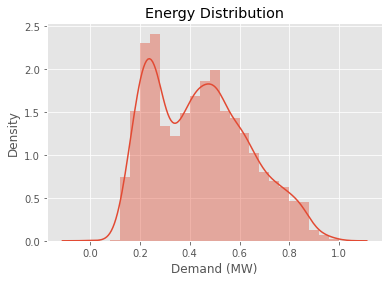

In [ ]:
sns.distplot(scaled_df["Demand (MW)"])
plt.title("Energy Distribution")

In [ ]:
x=scaled_df.drop('Demand (MW)',axis=1)
x

,Temp_max,Temp_min,Humidity,Pressure,Wind_speed,Population Density
0,0.571429,0.178571,0.195652,0.503601,0.153846,0.0
1,0.321429,0.250000,0.739130,0.503047,0.153846,0.0
2,0.392857,0.178571,0.695652,0.503601,0.153846,0.0
3,0.428571,0.214286,0.652174,0.503047,0.230769,0.0
4,0.464286,0.142857,0.521739,0.503047,0.153846,0.0
...,...,...,...,...,...,...
3795,0.642857,0.535714,0.695652,0.497507,0.153846,1.0
3796,0.678571,0.500000,0.586957,0.496399,0.153846,1.0
3797,0.785714,0.571429,0.652174,0.495845,0.307692,1.0
3798,0.714286,0.535714,0.673913,0.495291,0.307692,1.0


In [ ]:

y=scaled_df['Demand (MW)']
y

0       0.135506
1       0.128645
2       0.135506
3       0.132933
4       0.135506
          ...   
3795    0.727273
3796    0.941681
3797    0.767581
3798    0.777873
3799    0.855060
Name: Demand (MW), Length: 3800, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(x,y, test_size=0.2, random_state=40)


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
Training_score=reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Testing_score=reg.score(X_test, Y_test)
Testing_score

0.8442543852172864

In [ ]:
predict=reg.predict([[0.571429,	0.178571,	0.195652,	0.503601,	0.153846,	0.0]])
predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.11996471])

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(reg,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.81293931 0.85799387 0.81013396 0.81851104 0.82731924]
Average Cross Validation score :0.8253794840932738


In [ ]:
print(f'Test accuracy: {reg.score(X_test,Y_test)}')
print(f'Train accuracy: {reg.score(X_train,Y_train)}')

Test accuracy: 0.8442543852172864
Train accuracy: 0.8295179587133085


In [ ]:
# model evaluation for testing set
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print("RMSE:", rmse)
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.05826198432770451
MSE is 0.005798323817555888
RMSE: 0.07614672558656667
R2 score is 0.8442543852172864


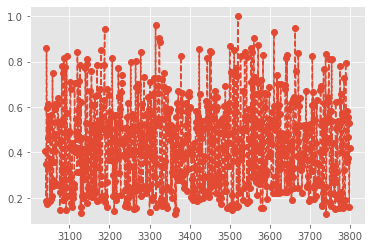

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train),Y_test,"o--")

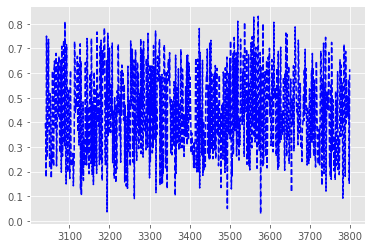

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train), Y_pred,"b--")

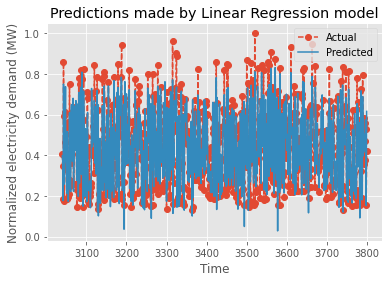

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train),Y_test,"o--")
plt.plot(np.arange(len(Y_pred)) + len(Y_train), Y_pred)
plt.xlabel('Time')
plt.ylabel('Normalized electricity demand (MW)')

plt.title("Predictions made by Linear Regression model")
plt.legend(['Actual', 'Predicted'])

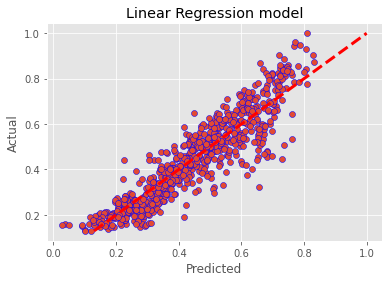

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
plt.title("Linear Regression model")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor(random_state = 0) 
training_score=dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
testing_score=dt.score(X_test, Y_test)
testing_score

0.7805648649265665

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(dt,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.77159967 0.75055441 0.73144154 0.73060085 0.72389265]
Average Cross Validation score :0.7416178253682512


In [ ]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print("RMSE:", rmse)
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.06154881223857641
MSE is 0.008169449726594178
RMSE: 0.09038500830665547
R2 score is 0.7805648649265665


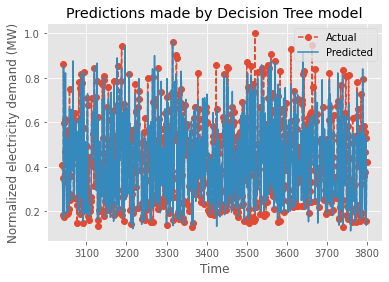

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train),Y_test,"o--")
plt.plot(np.arange(len(Y_pred)) + len(Y_train), Y_pred)
plt.xlabel('Time')
plt.ylabel('Normalized electricity demand (MW)')

plt.title("Predictions made by Decision Tree model")
plt.legend(['Actual', 'Predicted'])

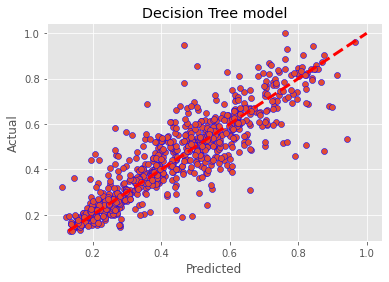

In [ ]:

fig, ax = plt.subplots()
ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
plt.title("Decision Tree model")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_test, Y_test)

0.8855184434337965

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(rf,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.86862468 0.87708822 0.85757915 0.85446847 0.85438425]
Average Cross Validation score :0.8624289554224523


In [ ]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print("RMSE:", rmse)
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.045087063851393945
MSE is 0.0042620855619901876
RMSE: 0.06528465027853168
R2 score is 0.8855184434337965


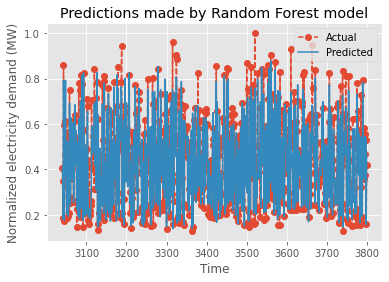

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train),Y_test,"o--")
plt.plot(np.arange(len(Y_pred)) + len(Y_train), Y_pred)
plt.xlabel('Time')
plt.ylabel('Normalized electricity demand (MW)')

plt.title("Predictions made by Random Forest model")
plt.legend(['Actual', 'Predicted'])

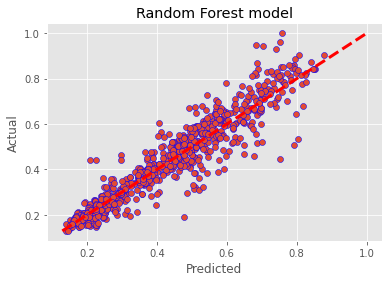

In [ ]:

fig, ax = plt.subplots()
ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
plt.title("Random Forest model")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.svm import SVR
sv = SVR(kernel='rbf')
sv.fit(X_train, Y_train)
Y_pred = sv.predict(X_test)
sv.score(X_test, Y_test)


0.8590043417799264

In [ ]:
kf=KFold(n_splits=5)
score=cross_val_score(sv,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.84346095 0.877783   0.83143613 0.8379342  0.83554576]
Average Cross Validation score :0.8452320082803414


In [ ]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print("RMSE:", rmse)
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.05405973760029145
MSE is 0.005249191024543452
RMSE: 0.07245130105487031
R2 score is 0.8590043417799264


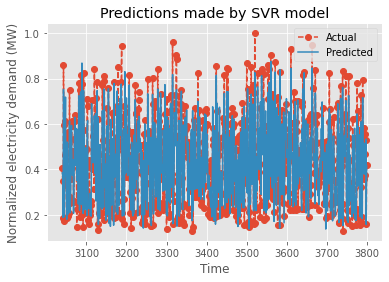

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train),Y_test,"o--")
plt.plot(np.arange(len(Y_pred)) + len(Y_train), Y_pred)
plt.xlabel('Time')
plt.ylabel('Normalized electricity demand (MW)')

plt.title("Predictions made by SVR model")
plt.legend(['Actual', 'Predicted'])

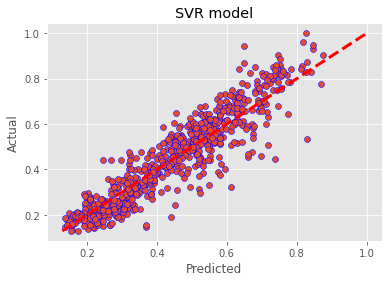

In [ ]:

fig, ax = plt.subplots()
ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
plt.title("SVR model")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn.score(X_test, Y_test)

0.835367046425766

In [ ]:
kf=KFold(n_splits=5)
score=cross_val_score(knn,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.80319231 0.84933521 0.83362261 0.80585209 0.80048728]
Average Cross Validation score :0.8184979015544908


In [ ]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print("RMSE:", rmse)
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.053472608061761566
MSE is 0.006129194566382133
RMSE: 0.0782891727276648
R2 score is 0.835367046425766


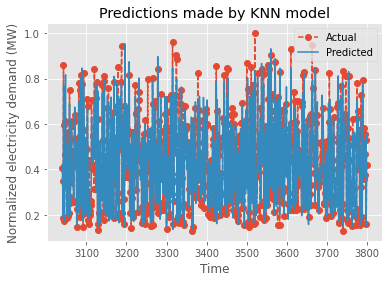

In [ ]:
plt.plot(np.arange(len(Y_pred)) + len(Y_train),Y_test,"o--")
plt.plot(np.arange(len(Y_pred)) + len(Y_train), Y_pred)
plt.xlabel('Time')
plt.ylabel('Normalized electricity demand (MW)')

plt.title("Predictions made by KNN model")
plt.legend(['Actual', 'Predicted'])

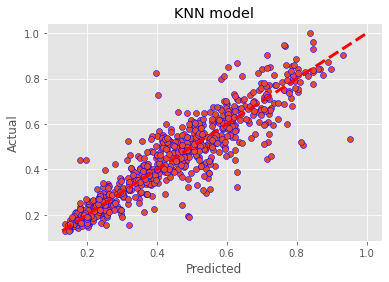

In [ ]:

fig, ax = plt.subplots()
ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
plt.title("KNN model")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)
hybrid_model = RuleAugmentedEstimator(gbc, rules)
hybrid_model.fit(X_train, Y_train)
predictions = hybrid_model.predict(X_test)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data to plot
acc = [0.7404298839911421, 0.8245956370053484, 0.8610493138706662, 0.84351417956665, 0.8164013931412735]



# create plot
fig, ax = plt.subplots()
bar_width = 0.55
X = np.arange(5)

p1 = plt.bar(X, acc, bar_width, color='#66CDAA',
label='Accuracy')

plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Accuracy')
plt.xticks(X + (bar_width/2) , ("DT", "LR", "RF", "SVR","KNN"))
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
    
#set heights of bars
bars1 = [0.05398110230321981, 0.062288352902986635, 0.04525234160933337, 0.05426207047966479, 0.05398110230321981]
bars2 = [0.006333937090183746, 0.008384953101428564, 0.004332758071821587, 0.005264728942629765, 0.006333937090183746]
bars3 = [0.07958603577376967, 0.09156938954382389, 0.06582368929057066, 0.072558451903481, 0.07958603577376967]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.ylabel('Error Values')
plt.title('Performance Metrics')
 
# Make the plot
plt.bar(r1, bars1, color='#52D017', width=barWidth, edgecolor='white', label='MAE')
plt.bar(r2, bars2, color='#FFA500', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r3, bars3, color='#0000FF', width=barWidth, edgecolor='white', label='RMSE')
 
# Add xticks on the middle of the group bars

plt.xlabel('MODEL', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(bars1))], ['Linear Regression', 'Decision Tree Regresssion', 'Random Forest Regression', 'Support Vector Regression','K Neighbors Regression'])
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['LR', 'DT', 'RF', 'SVR','KNN'])
 

# Create legend & Show graphic
plt.xticks(rotation=30)
plt.legend()
plt.show()